## Susannah D'Arcy

My goal for this notebook is to construct and analyse 2 movie datasets. From these datasets I will generate 2 networks which will represent the co-starring relations between actors. For both of my networks I will use a variety of methods to characterise the structure and connectivity of the actors. I will use centrality functions to identify key influential actors. With these influential nodes I will be able to generate a sub ego-centric network, which will also express the connectivity of my networks and the influence of the identified actors. Lastly I hope to generate a Gephi visualisation which will allow for a better understanding of my network as a whole, from this image I will possibly be able to identify new characteristics of my networks.

## 1.0 Network Construction
To represent the connectivity of co-star actors I will use an Undirected Weighted Network. Undirected networks are able to express the 2 way relationship of co-starring in a film, i.e. if Bob works with Alice, Alice works with Bob. I will use the weighted attribute to represent the amount of times the actors have co-starred/worked together.

In [2]:
import requests, zipfile, io
import json

json_file1 = open("data/16200408-dataset1.json","r")
data1 = json.load( json_file1 )
json_file1.close()

json_file2 = open("data/16200408-dataset2.json","r")
data2 = json.load( json_file2 )
json_file2.close()

### 1.1 Define Co-Star
Our dataset of people have their role assigned to each movie. To represent co-stars I felt that only actors/actresses count towards that metric, while other non 'star' roles such as director should be excluded from my network. To remove non-actor roles I first need to find all of the different roles in my 2 data sets.

In [3]:
def findRoles(data):
    roles =[]
    for actor in data:
        for movie in actor["movies"]:
            role = movie["role"]
            if role not in roles:
                roles.append(role)
    return roles

r1 = findRoles(data1)
r2 = findRoles(data2)
print(r1)
print(r2)

['actress', 'actor', 'director']
['actor', 'actress', 'director']


From our 2 datasets we have 3 roles, actor, actress and director. Will exclude directors from my network, as they don't star in the movies.

### 1.2 Generating Network
To generate the network I will first generate a dictionary for each movie, which will hold the actors who star in that movie. From that list I can generate pairs using itertool’s combinations and create edges between each actor for all the movies in our dictionary. While I add actors I will exclude directors. As I create edges I will update the weight if we encounter a repeated pair, meaning they have co-starred before.

In [3]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

def generateGraph(data):
    g = nx.Graph()
    Movies = {}
    costarRoles = ["actress", "actor"]
    
    for actor in data:
        g.add_node( actor["name"], id=actor["id"])
        for movie in actor["movies"]:
            if  movie["role"] in costarRoles:
                g.nodes[actor["name"]]["role"] = movie["role"]  
                movieID = movie["title"]
                if movieID not in Movies:
                    Movies[movieID] = [actor["name"]]
                else:
                     Movies[movieID].append(actor["name"])
    for movie in Movies:
        if len(Movies[movie]) > 1:
            for pair in itertools.combinations(Movies[movie],2):
                if g.has_edge(*pair):
                    g[pair[0]][pair[1]]["weight"] += 1
                else:
                    g.add_edge(*pair, weight = 1)
    return g

#### Intial Network 1

C:\Users\Susie\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


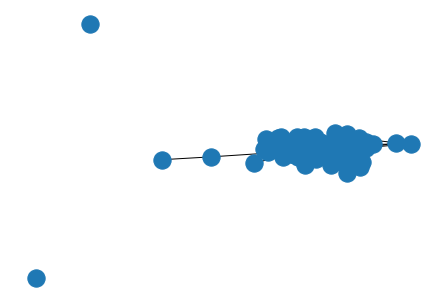

In [4]:
g1 = generateGraph(data1)
nx.draw(g1)

#### Intial Network 2

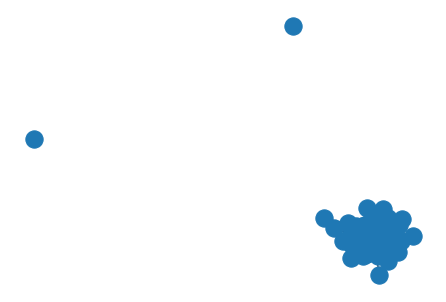

In [5]:
g2 = generateGraph(data2)
nx.draw(g2)

### 1.3 Indenitfy and Remove Isloated Nodes
I will use Networkx's isolate and remove_nodes_from functions to identify nodes which have no edges in our network.

#### Cleaned Network 1

Isolated Nodes:  ['Gracy Singh', 'Ye-jin Son']
Nodes Removed


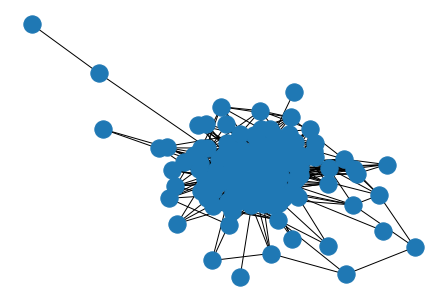

In [6]:
print("Isolated Nodes: ", list(nx.isolates(g1)))
g1.remove_nodes_from(list(nx.isolates(g1)))
print("Nodes Removed")
nx.draw(g1)

#### Cleaned Network 2

Isolated Nodes:  ['Soha Ali Khan', 'Broderick Crawford']
Nodes Removed


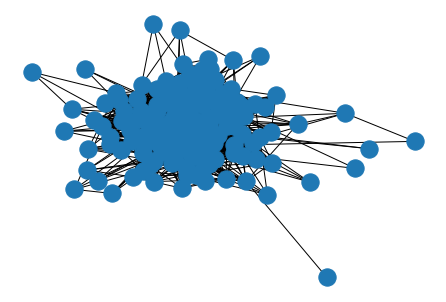

In [7]:
print("Isolated Nodes: ", list(nx.isolates(g2)))
g2.remove_nodes_from(list(nx.isolates(g2)))
print("Nodes Removed")
nx.draw(g2)

## 2.0 Network Characterisation
In this section I will use a range of functions such as, degree, probability distribution and clustering to characterise the structure and connectivity of my network. By identifying the size and number of edges I will be able to see how many of my actors have co-starred which each other.

### 2.1 Density
A network density expresses the amount of connections within the network, if the network were to be dense, the amount of edges would be close to the potential edges. Thus a higher dense network would mean that the network would have a high connectivity.

In [8]:
print("Network 1 Density: ", round(nx.density(g1)*100,2), "%", sep='')
print("Network 2 Density: ", round(nx.density(g2)*100,2), "%", sep='')

Network 1 Density: 13.77%
Network 2 Density: 15.85%


Both of our networks have a low density which means we could describe them as having sparse structure and low connectivity. However Network 2 is denser than Network 1. In terms of our network, Network 2's actors worked together more than the actors in Network 1.

### 2.2 Shortest Path
Paths within our network can express how closely (or far apart) nodes are in relation. In terms of our network we can show the smallest connection one actor has to another. Shorter paths means our network has a higher connectivity, as there are more edges between each node.

We can use shortest_path_length() to show the distance between each of the nodes. I will use average_shortest_path_length() as network 1 has 140 nodes.

I will also use diameter() which will show the longest shortest path of the network.

In [9]:
print("Networks 1 Average Shortest Path", nx.average_shortest_path_length(g1))
print("Networks 2 Average Shortest Path", nx.average_shortest_path_length(g2))

print("Networks 1 Diameter",nx.diameter(g1))
print("Networks 2 Diameter",nx.diameter(g2))

Networks 1 Average Shortest Path 2.1216855087358684
Networks 2 Average Shortest Path 1.9767801857585139
Networks 1 Diameter 5
Networks 2 Diameter 4


From this we can again see that Network 2 has a higher connectivity than Network 1 as it has a smaller average shortest path, which means that on average its nodes are closer related. This is also shown in the difference between the networks diameters. Network 1 is 1 node wider, and therefore less connected.

### 2.3 Connection and Components
Our network will be described as connected if every node has a path to every other node. Meaning that each actor will be connected to all other actors. If our network is not connected we will show the sub which are fully connected, these are called the graphs components.

We have already removed the isolated nodes so this will remove the chance of having a single node component.

In [10]:
if not nx.is_connected(g1):
    print("Network 1 is not-connected, there are", nx.number_connected_components(g1), "components.")
else:
    print("Network 1 is connected, there are no sub components.")

if not nx.is_connected(g2):
    print("Network 2 is not-connected, there are", nx.number_connected_components(g2), "components.")
else:
    print("Network 2 is connected, there are no sub components.")

Network 1 is connected, there are no sub components.
Network 2 is connected, there are no sub components.


Both of our networks are connected, which means they both are solid networks which don't have any sub connected networks. This means for both of our networks all actors are connected to each other.

### 2.4 Clustering Coefficient
Clustering Coefficient is used to express whether or not a node shares neighbours with its neighbours, creating a close triad structure. This relationship can be referred also as transitivity. The pool of top celebrities is quite small, due to this I would assume that there would be a lot of transitivity as most of the top actors would have worked with each other, or would have worked with one of the co-stars past co-stars.

To possibly prove this assumption we will be calculating the clustering coefficient which is the fraction of pairs of neighbours with this close triad.

In [11]:
print("Network 1 Average Clustering Coefficient:", nx.average_clustering(g1))
coefficientMax = max(nx.clustering(g1), key=nx.clustering(g1).get)
coefficientMin = min(nx.clustering(g1), key=nx.clustering(g1).get)
print("Network 1 Actor with the Highest Clustering Coefficient is", coefficientMax, "with a score of", nx.clustering(g1, coefficientMax))
print("Network 1 Actor with the Lowest Clustering Coefficient is", coefficientMin, "with a score of", nx.clustering(g1, coefficientMin))

print("Network 2 Average Clustering Coefficient:", nx.average_clustering(g2))
coefficientMax = max(nx.clustering(g2), key=nx.clustering(g2).get)
coefficientMin = min(nx.clustering(g2), key=nx.clustering(g2).get)
print("Network 2 Actor with the Highest Clustering Coefficient is", coefficientMax, "with a score of", nx.clustering(g2, coefficientMax))
print("Network 2 Actor with the Lowest Clustering Coefficient is", coefficientMin, "with a score of", nx.clustering(g2, coefficientMin))

Network 1 Average Clustering Coefficient: 0.30965627661271006
Network 1 Actor with the Highest Clustering Coefficient is Julia Jentsch with a score of 1.0
Network 1 Actor with the Lowest Clustering Coefficient is Hye-jeong Kang with a score of 0
Network 2 Average Clustering Coefficient: 0.32944322129114706
Network 2 Actor with the Highest Clustering Coefficient is Ryôko Hirosue with a score of 1.0
Network 2 Actor with the Lowest Clustering Coefficient is Roberto Benigni with a score of 0


### 2.5 Degree Distribution
Distribution allows you to see the trends and variance of values in our network. We calculate the frequency of each degree, and use this to make an histogram. This will allow us to gain some insights into the amount and frequency of connections each node in our network has. There are 2 distributions I will be calculating. One is the Degree Distribution which is simply the frequency of each node. The second is the Probability Distribution.

Probability Distribution P(k) is the fraction of all nodes in the network with degree k. We can use it to determine the probability that a node will have that degree. We calculate the probability by dividing each node count by the total number of nodes.

I will use the same methods to create these 2 histograms, therefore I will create a function which will adjust itself for weighted and unweighted degrees, and for degree distribution or probability distribution.

In [12]:
import collections
def getDistribution(g, isWeight, isProb):
    if isWeight:
        degree_sequence = sorted([d for n, d in g.degree(weight="weight")], reverse=True)
    else:
        degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
     
    degreeCount = collections.Counter(degree_sequence)
    
    if isProb:
        #Get P(k) for each degree
        degreeDist = {}
        n = len(g.degree())
        for degree in degreeCount:
            degreeDist[degree] = degreeCount[degree]/n
        deg, cnt = zip(*degreeDist.items())  
    else:
        deg, cnt = zip(*degreeCount.items()) 
        
    fig, ax = plt.subplots(figsize=(18,5))
    plt.bar(deg, cnt)

    plt.title("Probability Histogram")
    plt.xlabel("Degree")
    if isProb:
        plt.ylabel("Probability (k)")
    else:
        plt.ylabel("Count")


    plt.show()

####  2.5.1 Un-Weighted Degree Distribution

##### Network 1

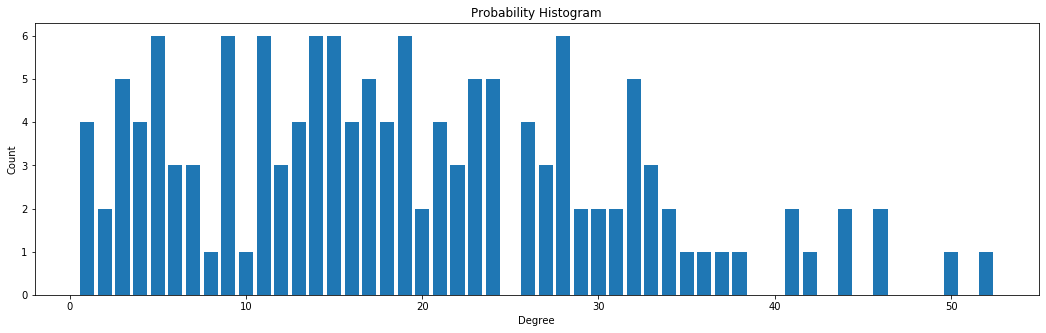

In [13]:
getDistribution(g1, False, False)

##### Network 2

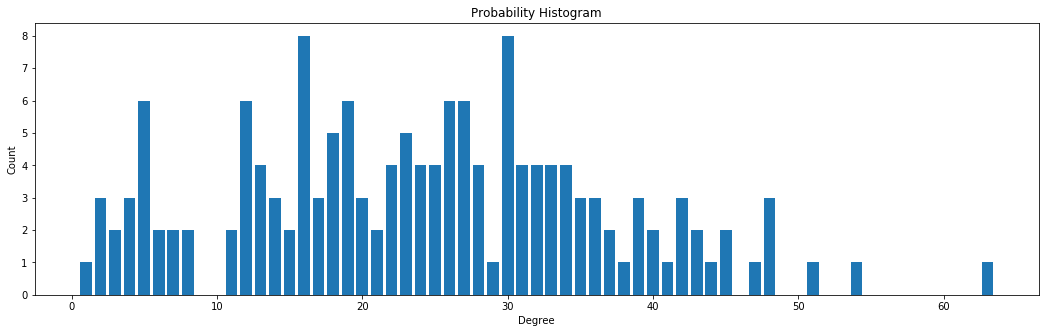

In [14]:
getDistribution(g2, False, False)

If our network was a random selection of nodes with random edges, with enough nodes our distribution will become normally distributed. With more nodes the distribution of the networks is easier to see and is more clear. However from these initial histograms we can see that Network 1 is right skewed, which is to be expected of real-world networks about connections (i.e Social Media), as it's more likely to have large actors or people with a small degree/connections, and only a select few would have co-starred with a lot of actors.

Network 2 has been shown (from previous calculations) to be more connected, which is why we have a more central distribution, as more nodes have more edges. Due to the higher connectivity of network 2 possibly with more nodes of a similar connection the distribution will become normal.

####  2.5.2 Weighted Degree Distribution

##### Network 1

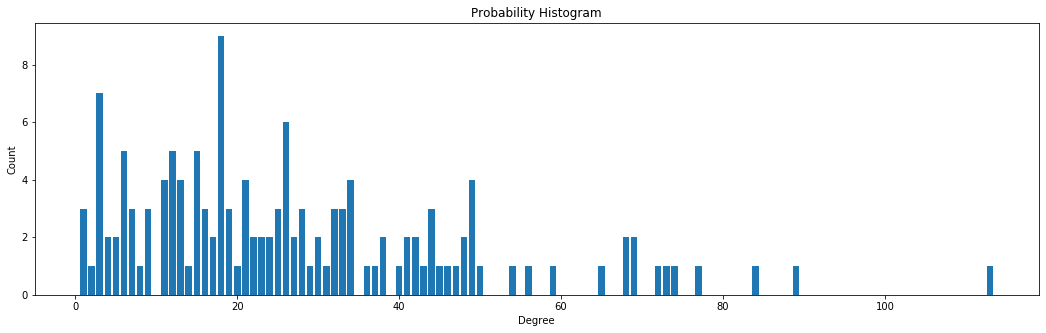

In [15]:
getDistribution(g1, True, False)

##### Network 2

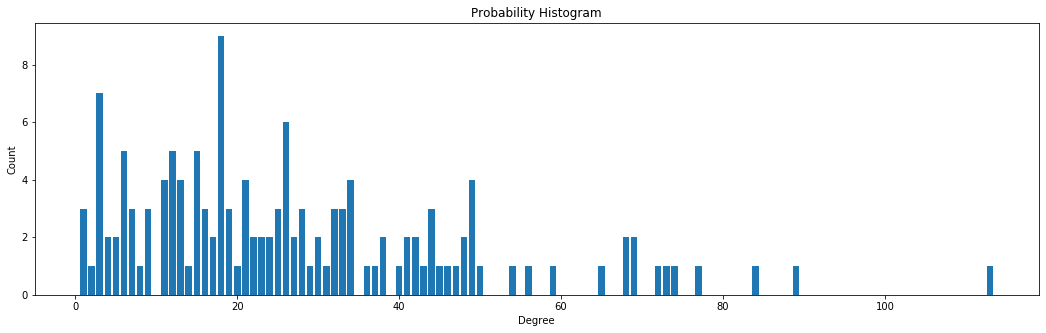

In [16]:
getDistribution(g1, True, False)

As we have included weights into our distribution we can see we have a wider range of degrees, which is to be expected. Due to this the distributions are more sparse with empty spaces. With more nodes this could change however.

Interestingly from introducing the weights the distribution structures have swapped for network 1 and 2. Now network 1 is more centrally distributed while network is right skewed. This could suggest that the nodes with smaller degrees in network 1 actually had high weights, which means that there are more actors with a small pool of actors they regularly co-star with. While network 2 has more varied actors who work with a wider range of co-stars, however they would only work with them once. 

## 2.6 Probability Distribution

#### 2.6.1 Un-Weighted Probability Distribution

##### Network 1

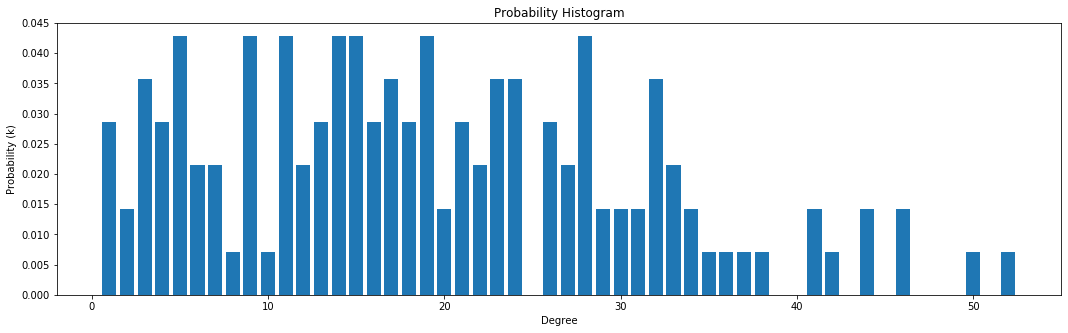

In [17]:
getDistribution(g1, False, True)

##### Network 2

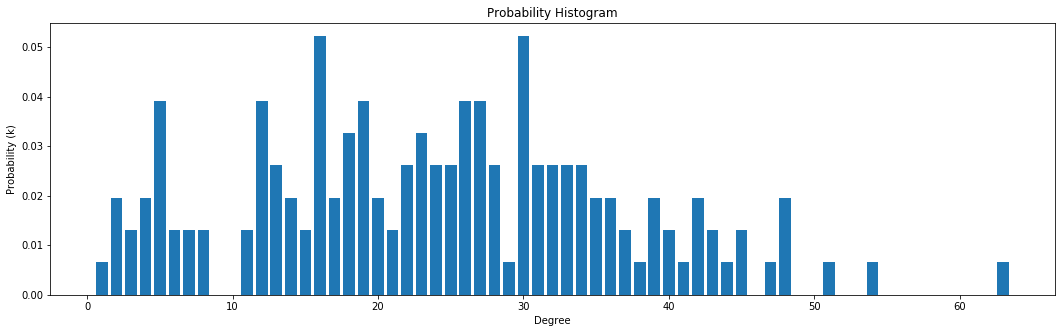

In [18]:
getDistribution(g2, False, True)

Introducing the Probability Distribution hasn't given us any more insight into the distribution or structure of our network, however we can now predict the degree of any new added nodes.

For Network 1 by looking at the top bars a new node will have a 4.5% chance of having a degree of 5. A 31.5% (4.5*7)chance to have a degree of either 5, 9, 11, 14, 15, 19, or 27.

For Network 2 we only have 2 degrees with the highest probability. For a new node it has a 5% probability to have a degree of 16.

#### 2.6.2 Weighted Probability Distribution

##### Network 1

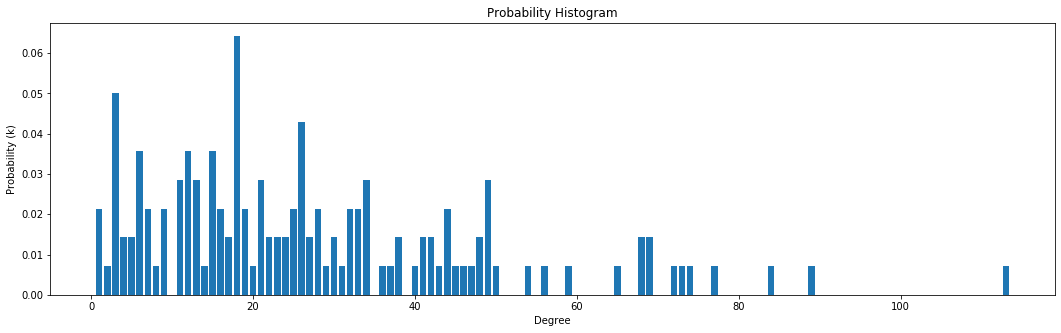

In [19]:
getDistribution(g1, True, True)

##### Network 2

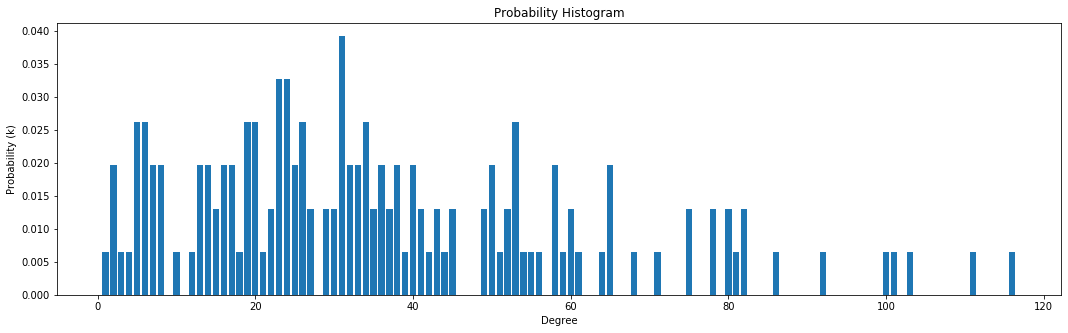

In [20]:
getDistribution(g2, True, True)

Because the weights made the distribution range wider, there is only 1 degree which has the highest probability (for both networks) For network 1 there is more than a 6% chance to have a degree of 19. For network 2 there is roughly a probability of 3.75% to a degree of 31.

## 3.0 Centrality Measures
From the previous section we have shown how connected our networks are. However this connectivity could be dependent on a few influential nodes. These nodes could have a lot of connections/edges, or they could be a bridge between popular nodes. In this section we will be using a variety of centrality measures to see which nodes are important and the variance of nodes in our network.

### 3.1 Degree Centrality
Degree is the number of edges a node has. It can represent how popular the actor is, or if they have a wide range of films/actors they work with. Degree centrality normalises the degree score which makes it much easier to compare networks.

For Degree Centrality we can either include the weights or not. I feel for this study its best to do both, as including the weights will show the amount of movies in total each actor has, and repeated co-stars. Not including the weights only represent the number of different co-stars they have worked with, not the repeated amounts.

For all centrality scores I will be calculating the mean centrality, the actor with the highest centrality, and their centrality score. I will make a function which does this for me.

In [21]:
import statistics

def getCentrality(centrality):
    average = statistics.mean(centrality[k] for k in centrality)
    maxActor = max(centrality, key=centrality.get)
    maxVal = centrality[maxActor]
    return [round(average,3),maxActor,round(maxVal,3)]

#### 3.1.1 Un-Weighted Degree Centrality

In [22]:
average = statistics.mean(g1.degree(k) for k in dict(g1.degree()))
print("Average Degree for Network 1 is", round(average,3))

average = statistics.mean(g2.degree(k) for k in dict(g2.degree()))
print("Average Degree for Network 2 is", round(average,3))

degreeCentrality1 =  getCentrality(nx.degree_centrality( g1 ))
degreeCentrality2 =  getCentrality(nx.degree_centrality( g2 ))

print("Average Degree Centrality for Network 1 is", degreeCentrality1[0])
print("Average Degree Centrality for Network 2 is", degreeCentrality2[0])

print("Actor from Network 1 with the highest degree is", degreeCentrality1[1], "with a degree of", degreeCentrality1[2])

maxActor = max(dict( g2.degree() ), key=dict( g2.degree() ).get)
print("Actor from Network 2 with the highest degree is", degreeCentrality2[1], "with a degree of", degreeCentrality2[2])


Average Degree for Network 1 is 19.143
Average Degree for Network 2 is 24.092
Average Degree Centrality for Network 1 is 0.138
Average Degree Centrality for Network 2 is 0.158
Actor from Network 1 with the highest degree is Bruce Willis with a degree of 0.374
Actor from Network 2 with the highest degree is Liam Neeson with a degree of 0.414


From simply looking at the degree you would assume that our networks are very connected as 19 and 24 are large numbers. However this is not normalised which is why we use degree centrality, which shows that actually our networks are not that connected as the average degree centrality is only 0.138 and 0.158.

We can use the degree to find the most popular actor, or the actor with the most varied co-stars. We discover that Bruce Willis and Liam Neeson have the most varied co-stars, which is not surprising as they are both very famous actors with a wide range of movies.

#### 3.1.2 Weighted Degree Centrality

As there was no Weighted Degree Centrality function, I will instead normalise each degree when I calculate the average.

In [23]:
average = statistics.mean(g1.degree(k, weight="weight") for k in dict(g1.degree(weight="weight")))
print("Average Weighted Degree for Network 1 is", round(average,3))

sum = 0
for key in dict( g1.degree(weight="weight") ) :
    sum+=(g1.degree(key, weight="weight")/len(dict(g1.degree(weight="weight"))))
average = sum/len(dict(g1.degree(weight="weight")))
print("Average Weighted Degree Centrality for Network 1 is", round(average,3))


average = statistics.mean(g2.degree(k, weight="weight") for k in dict(g2.degree(weight="weight")))
print("Average Weighted Degree for Network 2 is", round(average,3))

sum = 0
for key in dict( g2.degree(weight="weight") ) :
    sum+=(g2.degree(key, weight="weight")/len(dict(g2.degree(weight="weight"))))
average = sum/len(dict(g2.degree(weight="weight")))
print("Average Weighted Degree Centrality for Network 2 is", round(average,3))

maxActor = max(dict( g1.degree(weight="weight") ), key=dict( g1.degree(weight="weight") ).get)
print("Actor from Network 1 with the highest weighted degree is", maxActor, "with a degree of", g1.degree(maxActor, weight="weight"))

maxActor = max(dict( g2.degree(weight="weight") ), key=dict( g2.degree(weight="weight") ).get)
print("Actor from Network 2 with the highest weighted degree is", maxActor, "with a degree of", g2.degree(maxActor, weight="weight"))


Average Weighted Degree for Network 1 is 27.414
Average Weighted Degree Centrality for Network 1 is 0.196
Average Weighted Degree for Network 2 is 36.327
Average Weighted Degree Centrality for Network 2 is 0.237
Actor from Network 1 with the highest weighted degree is Michael Gambon with a degree of 113
Actor from Network 2 with the highest weighted degree is Robbie Coltrane with a degree of 116


As expected when you consider weight the degree value will increase. The increase shows that there are nodes/actors with a stronger relationship, as if the weight degree was to not change it suggests that there are no actors with repeated co-stars.

From the highest weighted degree we can see the actors with the most movie performances for each network, which is Micheal Gambon and Robbite Coltrane.

### 3.2 Betweenness Centrality
Betweenness can identify important nodes to the network as they represent nodes which occur on many of the other nodes shortest paths. These nodes can be called brokers or bridging nodes, and they represent key strategic linkages between all nodes in the system.

Nodes with high betweenness have a large influence on the network as they control the flow of information between all nodes. If you were to remove these nodes it could disrupt the connectivity of the whole network.

To calculate you take every pair of the network and count how many times a node can interrupt the shortest paths between the two nodes of the pair. We then normalise it to get the centrality. Luckily there is a function which will do this for me.

In [24]:
betweennessCentrality1 =  getCentrality(nx.betweenness_centrality( g1 ))
betweennessCentrality2 =  getCentrality(nx.betweenness_centrality( g2 ))

print("Average Betweenness Centrality for Network 1 is", betweennessCentrality1[0])
print("Average Betweenness Centrality for Network 2 is", betweennessCentrality2[0])

print("A possible Broker from Network 1 with the highest Betweenness Centrality is", betweennessCentrality1[1], "with a value of", betweennessCentrality1[2])
print("A possible Broker from Network 2 with the highest Betweenness Centrality is",  betweennessCentrality2[1], "with a value of",  betweennessCentrality2[2])

Average Betweenness Centrality for Network 1 is 0.008
Average Betweenness Centrality for Network 2 is 0.006
A possible Broker from Network 1 with the highest Betweenness Centrality is Bruce Willis with a value of 0.049
A possible Broker from Network 2 with the highest Betweenness Centrality is Liam Neeson with a value of 0.048


Both our networks have a low average betweenness centrality, which suggest there aren’t many possibly broker nodes for both networks. Interestingly for both networks our brokers are the nodes with the highest degree, Bruce Willis and Liam Nesson. This makes sense, if a node has the most connections, it is more likely that they would be the bridge between other nodes in the network. This means that if we were to remove Bruce Willis and Liam Neeson from their networks it could have a big disruption to the connectivity of their networks.

### 3.3 Closeness Centrality
Closeness as the name suggests measure a nodes closeness to all other nodes in the network through direct or indirect connections. It's calculated by inverting the average distance of the node to all other nodes, and distance is the shortest path between 2 nodes.

We use closeness to represent a node’s ability to access information through its connections or the ‘grape vine'.

In [25]:
closenessCentrality1 = getCentrality(nx.closeness_centrality( g1 ))
closenessCentrality2 = getCentrality(nx.closeness_centrality( g2 ))

print("Average Closeness Centrality for Network 1 is", closenessCentrality1[0])
print("Average Closeness Centrality for Network 2 is", closenessCentrality2[0])


print("The actor who is closest to all other actors in Network 1 is", closenessCentrality1[1], "with a value of", closenessCentrality1[2])
print("The actor who is closest to all other actors in Network 1 is", closenessCentrality2[1], "with a value of", closenessCentrality2[2])



Average Closeness Centrality for Network 1 is 0.481
Average Closeness Centrality for Network 2 is 0.512
The actor who is closest to all other actors in Network 1 is Bruce Willis with a value of 0.599
The actor who is closest to all other actors in Network 1 is Liam Neeson with a value of 0.628


Possibly not surprisingly for both of our networks the actor with the highest closeness is the actor who has the highest degree, as they have more connections with distance of 1, which would make the overall mean distance low.

Due to the fact that both Bruce Willis and Liam Neeson are the closest and the brokers for their respective networks it shows that they have a huge influence in the network as they control the flow of information and are able to get the information quickly.

### 3.4 Eigenvector Centrality
Lastly to conclude our centrality investigation I will calculate the eigenvector centrality which uses all of the other centralities for its calculation. The eigenvector centrality of a node is proportional to the sum of the centrality scores of its neighbours. Which means that if a node was connected to an influential node (like Bruce Willis or Liam Neeson) it will also be important.

Eigenvector also takes into consideration that it's better to be connected to a small amount of important nodes, then connected to a large number of median influence nodes.

In [26]:
eigenvectorCentrality1 = getCentrality(nx.eigenvector_centrality( g1 ))
eigenvectorCentrality2 = getCentrality(nx.eigenvector_centrality( g2 ))

print("Average Eigenvector Centrality for Network 1 is", eigenvectorCentrality1[0])
print("Average Eigenvector Centrality for Network 2 is", eigenvectorCentrality2[0])

print("The actor with the highest Eigenvector Centrality in Network 1 is", eigenvectorCentrality1[1], "with a value of", eigenvectorCentrality1[2])
print("The actor with the highest Eigenvector Centrality in Network 2 is", eigenvectorCentrality2[1], "with a value of", eigenvectorCentrality2[2])

Average Eigenvector Centrality for Network 1 is 0.071
Average Eigenvector Centrality for Network 2 is 0.071
The actor with the highest Eigenvector Centrality in Network 1 is Bruce Willis with a value of 0.187
The actor with the highest Eigenvector Centrality in Network 2 is Liam Neeson with a value of 0.181


Again it seems that Bruce Willis and Liam Neeson have the highest Eigenvector Centrality for their respective networks, this emphasizes the importance of these actors in our network connectivity.

This suggests that both Bruce Willis and Liam Neeson are directly connected to other nodes which also have a high degree and high centrality. Possibly if we search for the 5 top nodes for each network we will see possibly if they are other important and influential nodes in the network that Bruce Willis and Liam Neeson are connected too.

I will use the sorted method to sort the results from our centrality check and gather the top 5 results.

In [27]:
def getCentralityTop5(centrality):
    top5Actors = sorted(centrality, key=centrality.get, reverse=True)[:5]
    top5 = {}
    for actor in top5Actors:
        top5[actor] = centrality[actor] 
    return top5

print("Top 5 degree centrality", getCentralityTop5(nx.degree_centrality( g1 )))
print("Top 5 betweenness centrality", getCentralityTop5(nx.betweenness_centrality( g1 )))
print("Top 5 closeness centrality", getCentralityTop5(nx.closeness_centrality( g1 )))
print("Top 5 eigenvector centrality", getCentralityTop5(nx.eigenvector_centrality( g1 )))

Top 5 degree centrality {'Bruce Willis': 0.37410071942446044, 'Susan Sarandon': 0.3597122302158274, 'William Hurt': 0.33093525179856115, 'Meryl Streep': 0.33093525179856115, 'Julianne Moore': 0.3165467625899281}
Top 5 betweenness centrality {'Bruce Willis': 0.04926660145550079, 'William Hurt': 0.0404812343452167, 'Susan Sarandon': 0.040279951897336894, 'Meryl Streep': 0.03453491723566412, "Brían F. O'Byrne": 0.03322464979523077}
Top 5 closeness centrality {'Bruce Willis': 0.5991379310344828, 'Susan Sarandon': 0.594017094017094, 'Meryl Streep': 0.5815899581589958, 'Willem Dafoe': 0.5743801652892562, 'Julianne Moore': 0.5743801652892562}
Top 5 eigenvector centrality {'Bruce Willis': 0.18722914954555708, 'Meryl Streep': 0.17829862452353318, 'Susan Sarandon': 0.1768165468347805, 'Michael Gambon': 0.17394346142877695, 'Julianne Moore': 0.16905804025523827}


 From this we can see that Bruce Willis, Susan Sarandon and Meryl Streep are all influential nodes in network 1. As they all have high eigenvectors it suggests that they are all connected to each other and co-stared a movie together. 'Death Becomes Her' stars all 3 influential actors which suggest that this movie is on our network.

In [28]:
print(nx.shortest_path_length(g1, "Bruce Willis", "Susan Sarandon"))
print(nx.shortest_path_length(g1, "Bruce Willis", "Meryl Streep"))
print(nx.shortest_path_length(g1, "Susan Sarandon", "Meryl Streep"))

1
1
1


From this quick search we can see that Bruce Willis, Susan Sarandon and Meryl Streep are directly connected to each other, which explains why all 3 are influential nodes as they all have high degrees, closeness, betweenness  and they are all directly connected together, which shows why they also have a high eigenvector centrality.

## 4.0 Ego-centric Analysis
We are now going to analyse our network on a smaller scale by creating an ego-centric network. The subnetwork is simply a graph made up of the focus node and its neighbours. Its edges only consist of the connections between the neighbours and the focus node. For our ego-centric nodes I will be using the most influential nodes Bruce Willis and Liam Neeson as the focus nodes.

### 4.1 Ego-network Construction

##### Network 1

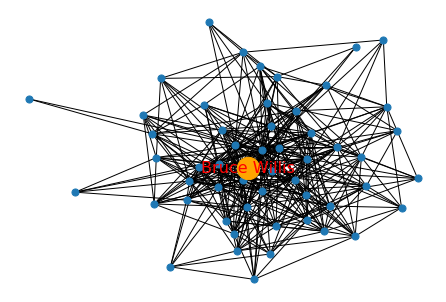

In [29]:
ego1 = nx.ego_graph( g1, "Bruce Willis" )
labels1={"Bruce Willis": "Bruce Willis" } 
nx.draw(ego1, with_labels=False, node_size = 50)
pos=nx.spring_layout(ego1)
nx.draw_networkx_labels(ego1, pos, labels1,font_size=16,font_color='r')
nx.draw_networkx_nodes(ego1, pos, nodelist=["Bruce Willis"], node_color='orange', node_size=500,)

##### Network 2

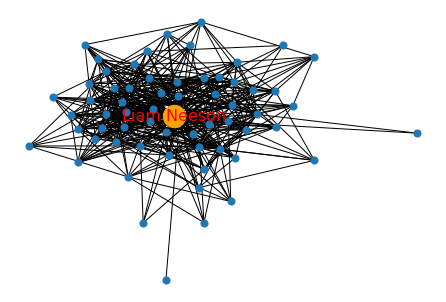

In [30]:
ego2 = nx.ego_graph( g2, "Liam Neeson" )
labels2={"Liam Neeson": "Liam Neeson" } 
nx.draw(ego2, with_labels=False, node_size = 50)
pos=nx.spring_layout(ego2)
nx.draw_networkx_labels(ego2, pos, labels2,font_size=16,font_color='r')
nx.draw_networkx_nodes(ego2, pos, nodelist=["Liam Neeson"], node_color='orange', node_size=500,)

As we expected both of the new networks look connected with our influential focus node in the centre as they are the central node connecting all nodes in our ego network.

### 4.2 Ego-network Centrality
To analyse the structure of our new ego networks I will be using the same centrality function I created before. However as our focus node is connected to all nodes, their centrality score will be 1 for all centrality measures. Which means that to find the node with the highest centrality score (besides our focus node) I will create another function (getCentralityEGO) which will take the top 2 and only use the 2nd value as our metric.

As we are testing for a lot of centralities, I will combine all centrality measures into one function

In [31]:
def getCentralityEGO(centrality):
    top2Actors = sorted(centrality, key=centrality.get, reverse=True)[:2]
    average = statistics.mean(centrality[k] for k in centrality)
    maxVal = centrality[top2Actors[1]]
    return [round(average,3),top2Actors[1],round(maxVal,3)]


def analysisEGO(g, networkNum, getCentralityFun):
    #Density
    print("Network ", networkNum, " Density: ", round(nx.density(g)*100,2), "%", sep='')	
    
    #Connected
    if not nx.is_connected(g):
        print("Network", networkNum, "is not-connected, there are", nx.number_connected_components(g1), "components.")
    else:
        print("Network", networkNum, "is connected, there are no sub components.")

    #Shortest Path
    print("Networks", networkNum, "Average Shortest Path", nx.average_shortest_path_length(g))
    
    #Diameter
    print("Networks", networkNum, "Diameter",nx.diameter(g))

    #degree centrality
    centrality = getCentralityFun(nx.degree_centrality(g))
    print("Average Degree Centrality for Network", networkNum, "is", centrality[0])
    print("Actor from Network", networkNum, "with the highest degree is", centrality[1], "with a degree of", centrality[2])
    
    #betweenness centrality
    centrality = getCentralityFun(nx.betweenness_centrality(g))
    print("Average Betweenness Centrality for Network", networkNum, "is", centrality[0])
    print("A possible Broker from Network", networkNum, "with the highest Betweenness Centrality is", centrality[1], "with a value of", centrality[2])

    #closeness centrality
    centrality = getCentralityFun(nx.closeness_centrality(g))
    print("Average Closeness Centrality for Network", networkNum, "is", centrality[0])
    print("The actor who is closest to all other actors in Network", networkNum, "is", centrality[1], "with a value of", centrality[2])

    #eigenvector centrality
    centrality = getCentralityFun(nx.eigenvector_centrality(g))
    print("Average Eigenvector Centrality for Network", networkNum, "is", centrality[0])
    print("The actor with the highest Eigenvector Centrality in Network", networkNum, "is", centrality[1], "with a value of", centrality[2])

##### Network 1

In [32]:
analysisEGO(ego1, "Ego 1", getCentralityEGO)

Network Ego 1 Density: 27.65%
Network Ego 1 is connected, there are no sub components.
Networks Ego 1 Average Shortest Path 1.7249637155297532
Networks Ego 1 Diameter 2
Average Degree Centrality for Network Ego 1 is 0.276
Actor from Network Ego 1 with the highest degree is Julianne Moore with a degree of 0.538
Average Betweenness Centrality for Network Ego 1 is 0.014
A possible Broker from Network Ego 1 with the highest Betweenness Centrality is Julianne Moore with a value of 0.042
Average Closeness Centrality for Network Ego 1 is 0.586
The actor who is closest to all other actors in Network Ego 1 is Julianne Moore with a value of 0.684
Average Eigenvector Centrality for Network Ego 1 is 0.124
The actor with the highest Eigenvector Centrality in Network Ego 1 is Julianne Moore with a value of 0.228


In [33]:
analysisEGO(g1, 1, getCentrality)

Network 1 Density: 13.77%
Network 1 is connected, there are no sub components.
Networks 1 Average Shortest Path 2.1216855087358684
Networks 1 Diameter 5
Average Degree Centrality for Network 1 is 0.138
Actor from Network 1 with the highest degree is Bruce Willis with a degree of 0.374
Average Betweenness Centrality for Network 1 is 0.008
A possible Broker from Network 1 with the highest Betweenness Centrality is Bruce Willis with a value of 0.049
Average Closeness Centrality for Network 1 is 0.481
The actor who is closest to all other actors in Network 1 is Bruce Willis with a value of 0.599
Average Eigenvector Centrality for Network 1 is 0.071
The actor with the highest Eigenvector Centrality in Network 1 is Bruce Willis with a value of 0.187


The average shortest distance is very low due to the ego-centric node format, the only allowed distances between each node would be 1 (edges between Bruce Willis, or neighbouring nodes), or 2 (nodes which connect via Bruce Willis).

By comparing the new and the old networks we can see that the ego network has a much higher connectivity, and all of the centralities have increased. You could therefore suggest that Bruce Willis accounted for Networks 1 connectivity.

However there is not an extreme increase in connectivity in this ego network, which suggests that from Bruce Willis' co-stars there are a small number of actors who work with each other. I was expecting a higher centrality score for an ego-centric network, however this wasn’t the case.

From this we can see that the most influential node in this network is Julianne Moore. Which is different to our original top 3 of Bruce Willis, Susan Sarandon and Meryl Streep. This suggests that the other 2 actors have a high connectivity to another section of network 1 and do not share that connectivity with actors in Bruce Willis's Ego Network.  

##### Network 2

In [34]:
analysisEGO(ego2, "Ego 2", getCentralityEGO)

Network Ego 2 Density: 25.64%
Network Ego 2 is connected, there are no sub components.
Networks Ego 2 Average Shortest Path 1.7465277777777777
Networks Ego 2 Diameter 2
Average Degree Centrality for Network Ego 2 is 0.256
Actor from Network Ego 2 with the highest degree is Ralph Fiennes with a degree of 0.46
Average Betweenness Centrality for Network Ego 2 is 0.012
A possible Broker from Network Ego 2 with the highest Betweenness Centrality is Robert De Niro with a value of 0.027
Average Closeness Centrality for Network Ego 2 is 0.577
The actor who is closest to all other actors in Network Ego 2 is Ralph Fiennes with a value of 0.649
Average Eigenvector Centrality for Network Ego 2 is 0.114
The actor with the highest Eigenvector Centrality in Network Ego 2 is Ralph Fiennes with a value of 0.202


In [35]:
analysisEGO(g2, 2, getCentrality)

Network 2 Density: 15.85%
Network 2 is connected, there are no sub components.
Networks 2 Average Shortest Path 1.9767801857585139
Networks 2 Diameter 4
Average Degree Centrality for Network 2 is 0.158
Actor from Network 2 with the highest degree is Liam Neeson with a degree of 0.414
Average Betweenness Centrality for Network 2 is 0.006
A possible Broker from Network 2 with the highest Betweenness Centrality is Liam Neeson with a value of 0.048
Average Closeness Centrality for Network 2 is 0.512
The actor who is closest to all other actors in Network 2 is Liam Neeson with a value of 0.628
Average Eigenvector Centrality for Network 2 is 0.071
The actor with the highest Eigenvector Centrality in Network 2 is Liam Neeson with a value of 0.181


Again we see that the ego-centric node has better connectivity and centrality than the original network 2. Although from this analysis we have 2 possible influential nodes Ralph Fiennes and Robert De Niro.

From previous analysis we saw that network 2 has a higher connectivity than network 1, however in this case ego 1 has a better connectivity than ego 2. From this you could suggest that Liam Neeson was not responsible for the high connectivity in network 2. Another suggestion is that network 2 had higher connectivity in the nodes outside of Liam Neeson’s connective circle, meaning that Liam Neeson's neighbours’ neighbours were very connected. Which is why he was central to the network and very influential but with the ego-network in isolation we lose that connectivity.

### 4.3 Ego minus the ego network
To further my analysis I want to look into what the network would look if we were to remove the influential node from its ego network and analyse the new structure. I will be using the same methods and functions previously, however I can now go back to my old getCenturality function as we do not need to remove the influential node from our analysis

I have used a try and catch for this analysis as centrality measures can only be used on a connected network.

##### Network 1

In [36]:
eWithoutE1 = ego1.copy()
eWithoutE1.remove_node('Bruce Willis')
try:
    analysisEGO(eWithoutE1, "'Without E 1'", getCentrality)
except:
    print("Error Occurred")
    pass

Network 'Without E 1' Density: 24.81%
Network 'Without E 1' is connected, there are no sub components.
Networks 'Without E 1' Average Shortest Path 1.8695324283559578
Networks 'Without E 1' Diameter 4
Average Degree Centrality for Network 'Without E 1' is 0.248
Actor from Network 'Without E 1' with the highest degree is Julianne Moore with a degree of 0.529
Average Betweenness Centrality for Network 'Without E 1' is 0.017
A possible Broker from Network 'Without E 1' with the highest Betweenness Centrality is Julianne Moore with a value of 0.077
Average Closeness Centrality for Network 'Without E 1' is 0.543
The actor who is closest to all other actors in Network 'Without E 1' is Julianne Moore with a value of 0.662
Average Eigenvector Centrality for Network 'Without E 1' is 0.124
The actor with the highest Eigenvector Centrality in Network 'Without E 1' is Julianne Moore with a value of 0.256


In [37]:
analysisEGO(ego1, "Ego 1", getCentralityEGO)

Network Ego 1 Density: 27.65%
Network Ego 1 is connected, there are no sub components.
Networks Ego 1 Average Shortest Path 1.7249637155297532
Networks Ego 1 Diameter 2
Average Degree Centrality for Network Ego 1 is 0.276
Actor from Network Ego 1 with the highest degree is Julianne Moore with a degree of 0.538
Average Betweenness Centrality for Network Ego 1 is 0.014
A possible Broker from Network Ego 1 with the highest Betweenness Centrality is Julianne Moore with a value of 0.042
Average Closeness Centrality for Network Ego 1 is 0.586
The actor who is closest to all other actors in Network Ego 1 is Julianne Moore with a value of 0.684
Average Eigenvector Centrality for Network Ego 1 is 0.124
The actor with the highest Eigenvector Centrality in Network Ego 1 is Julianne Moore with a value of 0.228


Surprisingly removing Bruce Willis from its own ego-centric network did not change the connectivity too much, as there is only a slight change in the results. Julianne Moore is still the most influential node, which suggests that Julianne Moore has worked with a lot of the same actors as Bruce Willis, and that Julianne Moore and Bruce Willis have a very similar co-star pool.

##### Network 2

In [38]:
eWithoutE2 = ego2.copy()
eWithoutE2.remove_node('Liam Neeson')

try:
    analysisEGO(eWithoutE2, "'Without E 2'", getCentrality)
except:
    print("Error Occurred")
    pass

Network 'Without E 2' Density: 23.25%
Network 'Without E 2' is not-connected, there are 1 components.
Error Occurred


From this error and our last output statement removing Liam Neeson from our ego network removed its connected status. There is only 1 component however, which means that we have actors which are isolated.

Isolated Nodes:  ['Anamaria Marinca']


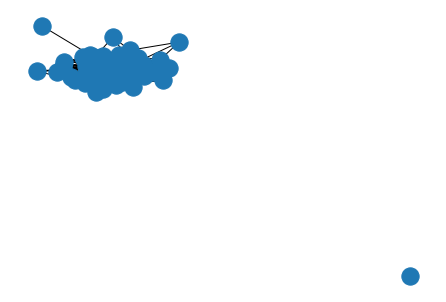

In [39]:
print("Isolated Nodes: ", list(nx.isolates(eWithoutE2)))
nx.draw(eWithoutE2)

This shows Liam Neeson was the only connection that Anamaria Marinca has to the other actors in our network. This could be the reason for the low connectivity of Ego Network 2 as we have 1 node which only had 1 connection to our influential node. This also shows that Anamaria Marinca and Liam Neeson do not share any co-stars, and possibly that they act in very different movies.

## 5.0 Network Visualisation

### 5.1 Export Network

In [40]:
nx.write_gexf(g1, "network1.gexf")

In [41]:
nx.write_gexf(g2, "network2.gexf")

### 5.2 New Network Visualisation

I now used Gephi to generate a nice visualisation as the python ones are hard to understand and customise. For each of my networks I changed the colour of each node depending on if they are an actress or an actor. I used the degree to determine the size of the node and label. Finally the edges were coloured depending on the weight.

#### Network 1
![title](network1.png)

In this network we can see a small cluster of nodes with high weights (darker thicker edges) connected to each other, on closer inspection these actors are all in the Harry Potter Films, thus their high connection which each other.
#### Network 2
![title](network2.png)

We have another cluster of actors from the Harry Potter movies in this network as well. This shows the importance of visualisation, unless I personally looked for Harry Potter actors and their connections to each other I would have never of noticed these details about these networks. However as I can see it clearly and visually it's easy for me to understand and recognise the patterns in the network.

### 5.3 Ego-network Visualisation
I also decided to use the filter function and generate a visualisation for the Ego-Centric Networks.

#### Ego 1
![title](ego1.png)

#### Ego 2
![title](ego2.png)

In this visualisation we can see Anamaria Marinca faintly with only 1 edge, representing that she only has Liam Neeson as her connection in the Ego 2 Network.

## 6.0 Conclusion
From our analysis of my 2 networks we can see that Liam Neeson and Bruce Willis were influential nodes to their network. We discovered this by examining the structure of the network along with their centrality scores. From this we could show how these actors were central to the connections of other actors in the network. However only once we visualised our network did we see the pattern of Harry Potter films and the huge influence they had in both of our networks. A possible next study for our dataset would be to analyse the movies, and how actors connected them to each other.